# MACLAURIN SERIES

$$f(x) = f(0) + f'(0)+\frac{f''(0)}{2!}x^2+\frac{f^{(3)}(0)}{3!}x^3+\cdots+\frac{f^{(n)}(0)}{n!}x^n+\cdots$$

$e^x$ using maclaurin

$e^x = \sum_{n=0}^{\infty}\frac{x^n}{n!}=1+x+\frac{x^2}{2}+\frac{x^3}{6}\cdots$

Step 1: Import libraries

In [ ]:
import numpy as np
import sympy as smp
from math import *
from sympy import *

factorize = np.vectorize(factorial)

Step 2: Define a new function $e^x$

In [ ]:
x = smp.symbols('x')
def e_x(x, terms=10):
    n = np.arange(terms)
    return np.sum(x**n/factorize(n))

Step 3: check if the function is properly implemented

In [ ]:
if __name__ == "__main__":
    print("Actual:", 1/x * smp.sin(x))

    print("N (terms)\tMaclaurin\tError")

    for n in range(1,14):
        maclaurin = e_x(2, terms=n)
        print(f"{n}\t\t{maclaurin:.05f}")

In [ ]:
import math
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

x = 1
maclaurin = 1/x*sin(x)
for i in range(10):
    maclaurin += x**i/math.factorial(i)

In [ ]:
maclaurin

In [ ]:
x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ['First Order', 'Third Order', 'Fifth Order', 'Seventh Order']

plt.figure(figsize=(10, 8))
for n, label in zip(range(4), labels):
    y = y + ((-1)**n * (x)**(2*n)) / np.math.factorial(2*n)
    plt.plot(x, y, label=label)

plt.plot(x, np.sin(x), 'k', label='Analytic')
plt.grid()
plt.title('Taylor Series Approximations of Various Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
def myexp(x):
    e = 0
    for i in range (0,100):
        e = e+(x**i)/math.factorial(i)
    print(e)

In [ ]:
import sympy as smp
from sympy import *

$$f(x)=\sum_{n=0}^{\infty}\frac{f^{(n)}(0)}{n!}x^n$$

In [ ]:
for i in range(0,10):
    mclrin = 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpmath import*
#Pendekatan jumlahan deret tak hingga
print('jumlahan deret')
mp.dps = 15
mp.pretty = True
def y(n): return n/(n+4)


sum = nsum(y, [1, inf])
print('sum=', sum)

#Perhitungan Pendekatan Limit
print('pendekatan limit')
def y(x): return (x*sin(x))/(x-pi)


print(limit(y, inf))

#Koeffisien Deret McLaurint
print('koeffisien Deret Maclaurint')
def f(x): return cos(x)


nprint([diff(f, 0, n) for n in range(5)])

#Plot Grafik Deret McLaurint
x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))
labels = ['S1', 'S2', 'S3', 'S4']
plt.figure()
for n, label in zip(range(4), labels):
    y = y + ((-1)**n * (x)**(2*n)) / np.math.factorial(2*n)
    plt.plot(x, y, label=label)
plt.plot(x, np.cos(x), 'k', label='Analytic')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right', prop={'size': 10})
plt.show()


In [ ]:
from scipy.misc import derivative
import math


class TaylorSeries():
    def __init__(self, function, order, center=0):
        self.center = center
        self.f = function
        self.order = order
        self.d_pts = order*2
        self.coefficients = []

        # number of points (order) for scipy.misc.derivative
        if self.d_pts % 2 == 0:  # must be odd and greater than derivative order
            self.d_pts += 1

        self.__find_coefficients()

    def __find_coefficients(self):
        for i in range(0, self.order+1):
            self.coefficients.append(round(derivative(
                self.f, self.center, n=i, order=self.d_pts)/math.factorial(i), 5))

    def print_equation(self):
        eqn_string = ""
        for i in range(self.order + 1):
            if self.coefficients[i] != 0:
                eqn_string += str(self.coefficients[i]) + (
                    "(x-{})^{}".format(self.center, i) if i > 0 else "") + " + "
        eqn_string = eqn_string[:-
                                3] if eqn_string.endswith(" + ") else eqn_string
        print(eqn_string)

    def print_coefficients(self):
        print(self.coefficients)

    def approximate_value(self, x):
        """
            Approximates the value of f(x) using the taylor polynomial.
            x = point to approximate f(x)
        """
        fx = 0
        for i in range(len(self.coefficients)):
            # coefficient * nth term
            fx += self.coefficients[i] * ((x - self.center)**i)
        return fx

    def approximate_derivative(self, x):
        """
            Estimates the derivative of a function f(x) from its Taylor series.
            Useless since we need the derivative of the actual function to find the series
        """
        value = 0
        # skip the first value (constant) as the derivative is 0
        for i in range(1, len(self.coefficients)):
            # differentiate each term: x^n => n*x^(n-1)
            value += self.coefficients[i] * i * ((x - self.center)**(i-1))
        return value

    def approximate_integral(self, x0, x1):
        """
            Estimates the definite integral of the function using the Taylor series expansion.
            More useful, consider e^x * sin(x), easy to differentiate but difficult to integrate.
            x0 - lower limit of integration
            x1 - upper limit of integration 
        """

        # integrals can be off by a constant since int(f(x)) = F(x) + C
        value = 0
        for i in range(len(self.coefficients)):
            value += ((self.coefficients[i] * (1/(i+1)) * ((x1 - self.center)**(i+1))) -
                      (self.coefficients[i] * (1/(i+1)) * ((x0 - self.center)**(i+1))))  # integrate each term: x^n => (1/n+1)*x^(n+1)
        return value

    def get_coefficients(self):
        """
            Returns the coefficients of the taylor series 
        """
        return self.coefficients


In [ ]:
maclaurin

In [ ]:
from sympy.series import series
print(series(sin(x), x0=0, n=10))


In [ ]:
import sympy as sy
import numpy as np
from sympy.functions import sin, cos
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Define the variable and the function to approximate
x = sy.Symbol('x')
f = sin(x)

# Factorial function


def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

# Taylor approximation at x0 of the function 'function'


def taylor(function, x0, n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x, i).subs(x, x0))/(factorial(i))*(x-x0)**i
        i += 1
    return p


In [ ]:
# Plot results
def plot():
    x_lims = [-5, 5]
    x1 = np.linspace(x_lims[0], x_lims[1], 800)
    y1 = []
    # Approximate up until 10 starting from 1 and using steps of 2
    for j in range(1, 10, 2):
        func = taylor(f, 0, j)
        print('Taylor expansion at n='+str(j), func)
        for k in x1:
            y1.append(func.subs(x, k))
        plt.plot(x1, y1, label='order '+str(j))
        y1 = []
    # Plot the function to approximate (sine, in this case)
    plt.plot(x1, np.sin(x1), label='sin of x')
    plt.xlim(x_lims)
    plt.ylim([-5, 5])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation')
    plt.show()


plot()


$$y = x^2 - 7x +1$$

In [1]:
import sympy as smp
from sympy import *

In [4]:
x,y = smp.symbols('x y')

In [5]:
y = x**2-7*x+1

In [6]:
y

x**2 - 7*x + 1

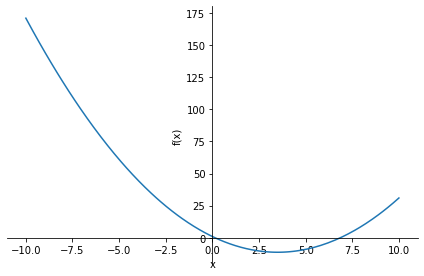

In [7]:
plot(y)